In [5]:
import pandas as pd
import numpy as np

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [89]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
import xgboost as xgb

In [13]:
df = pd.read_csv('supply_chain.csv')

In [15]:
df.head(2)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579


In [155]:
df.shape

(105, 25)

In [157]:
df.info

<bound method DataFrame.info of     Product type    SKU      Price  Availability  Number of products sold  \
0       haircare   SKU0  69.808006            55                      802   
1       skincare   SKU1  14.843523            95                      736   
2       haircare   SKU2  11.319683            34                        8   
3       skincare   SKU3  61.163343            68                       83   
4       skincare   SKU4   4.805496            26                      871   
..           ...    ...        ...           ...                      ...   
100     haircare  SKU83  68.911246            82                      663   
101     skincare  SKU53  30.341471            93                      242   
102     haircare  SKU70  47.914542            90                       32   
103     haircare  SKU45  33.784138             1                       24   
104    cosmetics  SKU44  51.355791            34                      919   

     Revenue generated Customer demographic

In [159]:
df.drop_duplicates(inplace=True)

In [161]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
disruption                 0
dtype: int64

In [163]:
df.dropna(inplace=True)

In [165]:
nunique = df.nunique()
constant_cols = nunique[nunique==1].index.tolist()

In [167]:
df.drop(columns = constant_cols,inplace=True)

In [169]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs,disruption
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,49.319555,48.952381,456.942857,5787.467039,48.133333,16.028571,48.847619,5.733333,5.522729,16.980952,573.914286,14.838095,47.695728,2.265828,529.974466,0.047619
std,30.566397,31.138765,307.091844,2703.983905,31.730556,8.711682,26.689374,2.686385,2.634134,8.880598,260.006957,8.814459,29.293986,1.441091,255.804446,0.213980
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.000000,1.085069,0.018608,103.916248,0.000000
25%,19.998177,23.000000,176.000000,2828.348746,16.000000,8.000000,26.000000,4.000000,3.585419,10.000000,362.000000,7.000000,22.554107,1.012563,320.846516,0.000000
50%,51.123870,44.000000,391.000000,6088.021480,48.000000,17.000000,52.000000,6.000000,5.288190,18.000000,580.000000,14.000000,46.279879,2.122472,523.360915,0.000000
75%,76.035544,78.000000,704.000000,8232.334829,73.000000,24.000000,71.000000,8.000000,7.577450,25.000000,794.000000,23.000000,69.929346,3.448063,761.173910,0.000000
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.000000,99.466109,4.939255,997.413450,1.000000


In [171]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs', 'disruption'],
      dtype='object')

In [173]:
print("\n Availability Unique:",df['Availability'].unique() )
print("\n Minimum Stock Levels:",df['Stock levels'].min() )
print("\n Maximum Stock Levels:",df['Stock levels'].max() )
print("\n Lead times median:",df['Lead times'].median() )
print("\n Lead times sample values:\n", df['Lead times'].sample(5))


 Availability Unique: [ 55  95  34  68  26  87  48  59  78  35  11  41   5  94  74  82  23 100
  22  60  30  32  73   9  42  12   3  10  28  43  63  96  75  97  98   6
   1  93  19  91  61  16  90  65  81  89  72  52  29  62  14  88  64  50
  56  13  99  83  18  24  58  44  17]

 Minimum Stock Levels: 0

 Maximum Stock Levels: 100

 Lead times median: 17.0

 Lead times sample values:
 85    18
48    16
66    17
23     5
52    11
Name: Lead times, dtype: int64


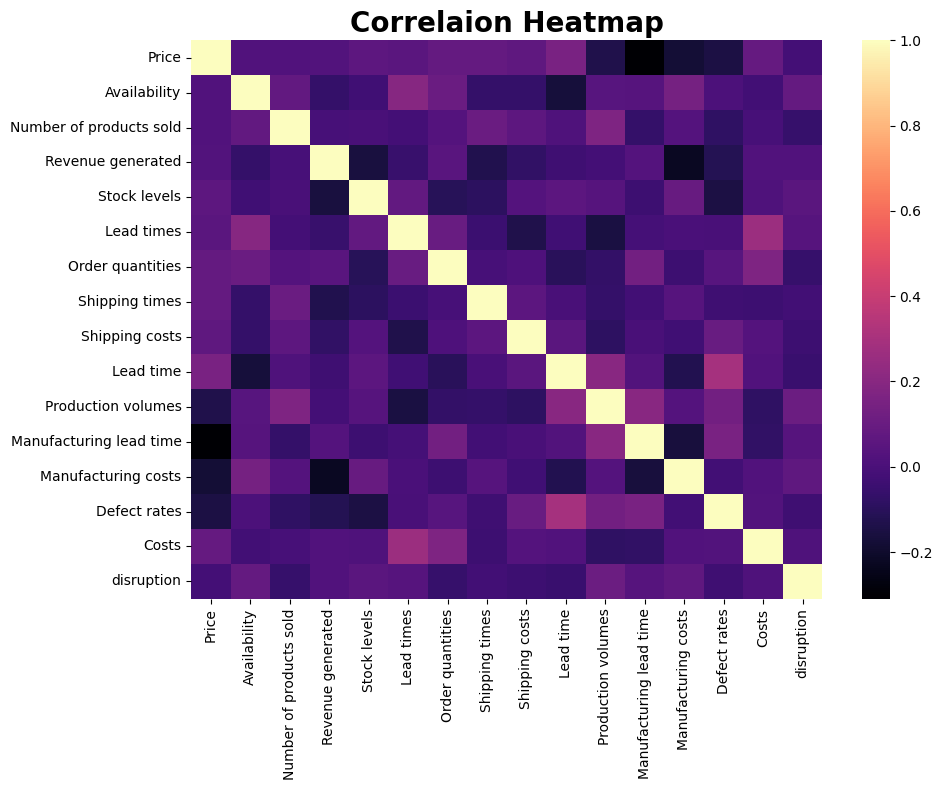

In [175]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=False,cmap='magma')
plt.title("Correlaion Heatmap",fontweight='heavy',fontsize=20)
plt.tight_layout()
plt.show()

In [177]:
df['disruption'] = (
    (df['Availability']<20)&
    (df['Stock levels']<20)&
    (df['Lead times']>df['Lead times'].median())
).astype(int)

In [179]:
df['disruption'].unique()

array([0])

In [181]:
df['disruption'].nunique()

1

In [191]:
df['disruption'].value_counts()

disruption
0    105
1      5
Name: count, dtype: int64

In [193]:
x=df.drop(columns=['disruption'])
y=df['disruption']

In [195]:
x = pd.get_dummies(x,drop_first=True)

In [237]:
x = x.astype(np.float32)
y = y.astype(int)

In [239]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [241]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [259]:
model = xgb.XGBClassifier(
    objective= 'binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_jobs=-1,
    verbosity=0 
)

In [261]:
param_grid = {
    'max_depth':[3,5],
    'learning_rate':[0.1],
    'n_estimators':[100],
    'subsample':[0.1],
    'colsample_bytree':[1.0]
}

In [263]:
grid_search = GridSearchCV(
    model,param_grid,
    cv=5, scoring = 'accuracy',
    n_jobs=-1, verbose=1
)

In [265]:
grid_search.fit(X_train,Y_train)
best_model=grid_search.best_estimator_

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [267]:
Y_pred = best_model.predict(X_test)
Y_pred_prob = best_model.predict_proba(X_test)[:,1]

In [269]:
print("\n Confussion Matrix:\n", confusion_matrix(Y_test,Y_pred))
print("\n Classification Report:\n",classification_report(Y_test,Y_pred))


 Confussion Matrix:
 [[21  0]
 [ 1  0]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       0.00      0.00      0.00         1

    accuracy                           0.95        22
   macro avg       0.48      0.50      0.49        22
weighted avg       0.91      0.95      0.93        22



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [271]:
if len(np.unique(Y_test))>1:
    roc_auc=roc_auc_score(Y_test,Y_pred_prob)
    print("\n ROC AUC SCORE:\n",roc_auc)
else:
    print("\n ROC AUC SCORE: CAnnot compute - only one class in test set.")


 ROC AUC SCORE:
 0.5


In [273]:
importance = best_model.get_booster().get_score(importance_type='weight')

In [275]:
if not importance :
    print("No feature importance found")
else:
    xgb.plot_importance(best_model,max_num_features=10)
    plt.title("TOP 10 IMPORTANT FEATURES")
    plt.tight_layout()
    plt.show()

No feature importance found


In [285]:
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False
)
model.fit(X_train, Y_train)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:03:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

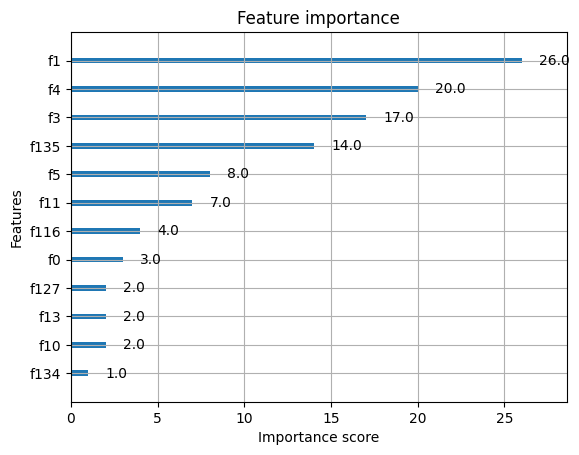

In [287]:
xgb.plot_importance(model)
plt.show()